# TD04 PSI 2019-2020

## Piles

### Exercice 1.	Implémenter les opérations élémentaires sur les piles
On rappelle le modèle choisi, à savoir qu’une pile sera représentée par une liste, le sommet de la pile correspondant au dernier élément de la liste.
•	créer_pile() : renvoie une pile vide
•	est_vide(p) : renvoie True si la pile p est vide, False sinon
•	empiler(p, v) : ajoute la valeur v au sommet de la pile p (en anglais : fonction « push »)
•	depiler(p) : supprime le sommet d’une pile p non vide (en anglais : fonction « pop »)
On pourra définir en complément une fonction qui affiche une pile, en colonne, avec son sommet qui sera affiché en premier.


In [1]:
def creer_pile():
    return []

def est_vide(p):
    return p == []

def empiler(p, v):
    p.append(v)

def depiler(p):
    return p.pop()

Fonction d'affichage (hors modèle)

In [2]:
def affiche_pile(p):
    print("*sommet*")
    for i in range(1, len(p) + 1):
        print(p[- i])
    print("*base*")

Construction d'une pile 

In [3]:
## construire la pile suivante (résultant de l'empilement successif des valeurs 0, puis 6 puis 10)
p = creer_pile()
empiler(p, 0)
empiler(p, 6)
empiler(p, 10)
affiche_pile(p)

*sommet*
10
6
0
*base*


## Pour les exercices sur les piles, la contrainte est de n’utiliser, pour créer, modifier ou manipuler une pile que les quatre fonctions précédentes.

### Exercice 2 <exercice donné en classe> ###
On considère un jeu de 52 cartes, représenté par une pile dont les éléments sont les entiers de 1 à 52.

Q2.1	Écrire une fonction créer_jeu(n) créant un jeu de n cartes (ordonné), sous la forme d’une pile (la carte 52 étant située à la base de la pile)

In [4]:
def creer_jeu(n):
    p = creer_pile()
    for i in range(n, 0, -1):
        empiler(p, i)
    return p

In [5]:
##
jeu = creer_jeu(52)
affiche_pile(jeu)

*sommet*
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
*base*


Q2.2. Écrire une fonction retourne(p) qui prend en argument une pile p et renvoie une pile composée des mêmes éléments mais dans l’ordre inverse. (Note : la pile donnée en argument sera vide à la fin de l'exécution de la fonction)

In [6]:
def retourne(p):
    p1 = creer_pile()
    while not est_vide(p):
        v = depiler(p)
        empiler(p1, v)
    return p1

In [7]:
## test
p = creer_jeu(5)
affiche_pile(p)
pr = retourne(p)
affiche_pile(pr)
affiche_pile(p)

*sommet*
1
2
3
4
5
*base*
*sommet*
5
4
3
2
1
*base*
*sommet*
*base*


Q2.3 [Pour cette question on supposera que la pile comporte un nombre pair d'éléments, connu] Écrire une fonction coupe(p, n) qui prend en argument une pile, p, de hauteur paire, égale à n, et son nombre d'éléments, n, et renvoie deux nouvelles piles composées l’une de la moitié supérieure de la pile p, l’autre de la moitié inférieure de p (sans changer l’ordre des cartes).

In [8]:
def coupe(p, n):
    p1, p2 = creer_pile(), creer_pile()
    for k in range(n // 2):
        empiler(p1, depiler(p))
    p1 = retourne(p1)
    for k in range(n // 2):
        empiler(p2, depiler(p))
    p2 = retourne(p2)
    return p1, p2

In [9]:
## test
p= creer_jeu(10)
affiche_pile(p)
p1, p2 = coupe(p, 10)
affiche_pile(p1) ; affiche_pile(p2)

*sommet*
1
2
3
4
5
6
7
8
9
10
*base*
*sommet*
1
2
3
4
5
*base*
*sommet*
6
7
8
9
10
*base*


Q2.4 Écrire une fonction melange(p1, p2) qui prend en argument deux piles, supposées de même hauteur, et qui renvoie une nouvelle pile dans laquelle on alterne les éléments de la pile 1 et de la pile 2. On demande que le sommet de la pile 1 se retrouve au sommet de la pile renvoyée.

In [10]:
def melange(p1, p2):
    p = creer_pile()
    while not est_vide(p1):
        empiler(p, depiler(p1))
        empiler(p, depiler(p2))
    return retourne(p)

In [11]:
##test
p = creer_jeu(10)
p1, p2 = coupe(p, 10)
p3 = melange(p1, p2)
affiche_pile(p3)

*sommet*
1
6
2
7
3
8
4
9
5
10
*base*


Q3.5 Vérifier qu'après n coupes suivies chacune d'un mélange, un jeu de 2**n cartes revient à son ordre initial.

In [12]:
##mélanges d'un jeu de 32 cartes
m = 5
n = 2**5
p = creer_jeu(n)
stop = False
while m > 0:
    p1, p2 = coupe(p, n)
    p = melange(p1, p2)
    affiche_pile(p)
    m = m - 1

*sommet*
1
17
2
18
3
19
4
20
5
21
6
22
7
23
8
24
9
25
10
26
11
27
12
28
13
29
14
30
15
31
16
32
*base*
*sommet*
1
9
17
25
2
10
18
26
3
11
19
27
4
12
20
28
5
13
21
29
6
14
22
30
7
15
23
31
8
16
24
32
*base*
*sommet*
1
5
9
13
17
21
25
29
2
6
10
14
18
22
26
30
3
7
11
15
19
23
27
31
4
8
12
16
20
24
28
32
*base*
*sommet*
1
3
5
7
9
11
13
15
17
19
21
23
25
27
29
31
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
*base*
*sommet*
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
*base*


## Exercice 3 Implémentation de la structure de file

Le type abstrait de données « file d’attente » est une structure linéaire de stockage munie des primitives suivantes :
•	creer_file() : 	revoyant une file vide ;
•	est_file_vide(f) :	renvoyant Vrai si la file f est vide, Faux sinon ;
•	ajouter(f, x) :	ajoute le « client » x à la fin de la file f ;
•	suivant(f) : 	renvoie le client en tête de la file non vide f et le supprime de f.
Q3.1.	Proposer une implémentation en Python où la file est stockée dans une liste. Évaluer la complexité des fonctions ajouter et suivant.

In [13]:
def creer_file():
    return []

def est_file_vide(f):
    return f == []

def ajouter(f, x):
    f.append(x)          ##derneir arrivé ajouté en fin de liste

def suivant(f):
    return f.pop(0)      ##premier client en position 0

def affiche_file(f):
    for i in range(len(f)-1):
        print(f[i], end='<-' )
    print(f[-1])

In [14]:
##tests
f = creer_file()
for i in range(1, 7):
    print("ajout de",i, end=" | file : ");ajouter(f, i)
    affiche_file(f)

for i in range(3):
    print(suivant(f), end=" servi  | file : ")
    affiche_file(f)
for i in range(7, 11):
    print("ajout de",i, end=" | file : ");ajouter(f, i)
    affiche_file(f)

ajout de 1 | file : 1
ajout de 2 | file : 1<-2
ajout de 3 | file : 1<-2<-3
ajout de 4 | file : 1<-2<-3<-4
ajout de 5 | file : 1<-2<-3<-4<-5
ajout de 6 | file : 1<-2<-3<-4<-5<-6
1 servi  | file : 2<-3<-4<-5<-6
2 servi  | file : 3<-4<-5<-6
3 servi  | file : 4<-5<-6
ajout de 7 | file : 4<-5<-6<-7
ajout de 8 | file : 4<-5<-6<-7<-8
ajout de 9 | file : 4<-5<-6<-7<-8<-9
ajout de 10 | file : 4<-5<-6<-7<-8<-9<-10


Q3.2.	Pour obtenir une complexité en temps constant (ou temps constant amorti) des deux fonctions ajouter et suivant, on se propose de stocker une file à l’aide deux piles :
•	la première contient le début de la file, le premier client de la file se trouvant au sommet ;
•	la seconde contient la fin de la file, le dernier client entré se trouvant au sommet.
Donner une implémentation de la structure de données en Python selon ce modèle. Concrètement, la file f pourra être définie comme une liste de deux piles, [p0, p1]. Expliquer l’intérêt de ce modèle du point de vue de la complexité.
Outre les primitives ci-dessus, on programmera l’affichage de la file.

In [15]:
def creer_file():
    return [creer_pile(), creer_pile()]

def est_file_vide(f):
    return est_vide(f[0]) and est_vide(f[1])

def ajouter(f, x):
    f[1].append(x)          ##derneir arrivé ajouté en fin de file

def suivant(f):
    if est_vide(f[0]):             ##si le début de file est vide
        while not est_vide(f[1]):  ##on bascule la fin de file sur le début de file
            empiler(f[0], depiler(f[1]))
    return f[0].pop()   #on extrait le premier arrivé

def affiche_file2(f):
    for i in range(1, len(f[0]) + 1):
        print(f[0][-i], end='<-' )
    print(" || ", end="")
    if len(f[1]) > 0:
        for i in range(0, len(f[1]) - 1):
            print(f[1][i], end='<-' )
        print(f[1][-1])
    else:
        print()

In [16]:
##tests
f = creer_file()
for i in range(1, 4):
    print("ajout de",i, end=" | file : ");ajouter(f, i)
    affiche_file2(f)

for i in range(2):
    print(suivant(f), end=" servi  | file : ")
    affiche_file2(f)

for i in range(5, 7):
    print("ajout de",i, end=" | file : ");ajouter(f, i)
    affiche_file2(f)

for i in range(3):
    print(suivant(f), end=" servi  | file : ")
    affiche_file2(f)

for i in range(7, 11):
    print("ajout de",i, end=" | file : ");ajouter(f, i)
    affiche_file2(f)

for i in range(1):
    print(suivant(f), end=" servi  | file : ")
    affiche_file2(f)

ajout de 1 | file :  || 1
ajout de 2 | file :  || 1<-2
ajout de 3 | file :  || 1<-2<-3
1 servi  | file : 2<-3<- || 
2 servi  | file : 3<- || 
ajout de 5 | file : 3<- || 5
ajout de 6 | file : 3<- || 5<-6
3 servi  | file :  || 5<-6
5 servi  | file : 6<- || 
6 servi  | file :  || 
ajout de 7 | file :  || 7
ajout de 8 | file :  || 7<-8
ajout de 9 | file :  || 7<-8<-9
ajout de 10 | file :  || 7<-8<-9<-10
7 servi  | file : 8<-9<-10<- || 


Complexité :
- les opérations sont en O(1) (se réduisent à des .append() ou des .pop(), sauf lorsque la pile f0 est vide au moment de l'appel à suivant, auquel cas la fonction suivant est en O(n) (n : nombre de clients dans la file).
La complexité de la fonction ajoute en temps constant (indépendant de n, nombre de clients dans la file).
La complexité est constante en temps amorti, c'est-à-dire que, en moyenne, la complexité de la fonction suivant est indépendante de n (nombre de clients dans la file) (admis ici).

## Problème 1

In [17]:
def creer_pile():
    return []

def est_vide(p):
    return p == []

def empiler(p, v):
    p.append(v)

def depiler(p):
    return p.pop()

In [18]:
def eval(expr):
    L = expr.split()
    p = creer_pile()
    for k in range(len(L)):
        if L[k].isdigit():
            empiler(p, int(L[k]))
        else:
            a = int(depiler(p))
            if L[k] == "(-)":
                empiler(p, - a)
            else:
                b = int(depiler(p))
                if L[k] == "+":
                    empiler(p, a + b)
                else:
                    empiler(p, a * b)
    return depiler(p)

In [19]:
expr = "3 5 7 2 + * + 4 8 9 * + +"
eval(expr)

124

In [20]:
E = (3 + (5 * (7 + 2))) + (4 + (8 * 9))
E

124

## Problème 2

In [97]:
def creer_pile():
    return []

def est_vide(p):
    return p == []

def empiler(p, v):
    p.append(v)

def depiler(p):
    return p.pop()

In [98]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors

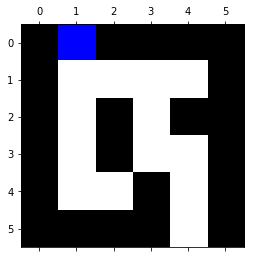

In [99]:
##la case de l'entrée est mise à deux car sinon (bug) toutes les cases vides apparaissent en bleu au lieu de blanc
laby = [[0, 2, 0, 0, 0, 0], \
        [0, 1, 1, 1, 1, 0], \
        [0, 1, 0, 1, 0, 0], \
        [0, 1, 0, 1, 1, 0], \
        [0, 1, 1, 0, 1, 0], \
        [0, 0, 0, 0, 1, 0]  \
       ]
##plt.matshow(laby)
plt.matshow(laby, cmap = colors.ListedColormap(['black', 'white', 'blue']))

In [100]:
def casesVoisines(laby, i, j):
    n = len(laby) ##rappel le labyrinthe est supposé carré
    L = []
    if i > 0 and laby[i - 1][j] == 1:
        L.append((i - 1, j))
    if i < n - 1 and laby[i + 1][j] == 1:
        L.append((i + 1, j))
    if j > 0 and laby[i][j - 1] == 1:
        L.append((i, j - 1))
    if j < n - 1 and laby[i][j + 1] == 1:
        L.append((i, j + 1))
    return L

In [101]:
casesVoisines(laby, 1, 1)

[(2, 1), (1, 2)]

In [102]:
def parcours(laby, entree, sortie):
    ie, je = entree
    io, jo = sortie
    p = creer_pile()
    laby[ie][je] = 2
    empiler(p, (ie, je))
    ##plt.matshow(laby, cmap = colors.ListedColormap(['black', 'white', 'blue']))
    while not est_vide(p):
        i, j = depiler(p)
        print(i, j)
        for c in casesVoisines(laby, i, j):
            iv, jv = c
            print(iv, jv, laby[iv][jv])
            if laby[iv][jv] == 1:
                laby[iv][jv] = 2
                empiler(p, (iv, jv))
            print(p)

In [103]:
parcours(laby, (0, 1), (5, 4))

0 1
1 1 1
[(1, 1)]
1 1
2 1 1
[(2, 1)]
1 2 1
[(2, 1), (1, 2)]
1 2
1 3 1
[(2, 1), (1, 3)]
1 3
2 3 1
[(2, 1), (2, 3)]
1 4 1
[(2, 1), (2, 3), (1, 4)]
1 4
2 3
3 3 1
[(2, 1), (3, 3)]
3 3
3 4 1
[(2, 1), (3, 4)]
3 4
4 4 1
[(2, 1), (4, 4)]
4 4
5 4 1
[(2, 1), (5, 4)]
5 4
2 1
3 1 1
[(3, 1)]
3 1
4 1 1
[(4, 1)]
4 1
4 2 1
[(4, 2)]
4 2


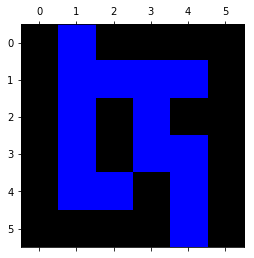

In [87]:
%matplotlib inline
plt.matshow(laby, cmap = colors.ListedColormap(['black', 'white', 'blue']))

### Application du parcours de labyrinthe au problème de percolation en milieu aléatoire

a. Construction du mileu poreux

In [148]:
##la case de l'entrée est mise à deux car sinon (bug)
##toutes les cases vides apparaissent en bleu au lieu de blanc
##(comme cette case vide se remplit d'eau à coup sûr, cela ne porte pas à conséquence)
def creerMilieu(n, p):
    import random
    T = [ [0 for j in range(n)] for i in range(n)] ##le tableau entier, implémenté sous la forme d'une liste de liste
                                                   ##est initialisé à 0
    T[0][1] = 2     ##ajout de l'entrée
    T[-1][-2] = 1   ##ajout de la sortie
    for j in range(1, n-1):
        T[1][j] = 1  ##ajout de la ligne d'écoulement à l'entrée
        T[-2][j] = 1 ##ajout de la ligne d'écoulement à la sortie
    ##création du milieu poreux interne
    for i in range(2, n - 2):
        for j in range(2, n - 1):
            if random.random() < p: #case vide avec la probabilité p
                T[i][j] = 1
    return T

In [149]:
##On modifie l'énoncé pour dissocier la création du tableau et l'affichage
##ceci permet de garder accès au tableau créé (qui n'est pas, du coup,
##une variable locale de la fonction afficherEcoulement)
##La fonction d'affichage prend ici un tableau composé d'entiers égaux à 0, 1 ou 2
def afficherEcoulement(T):
    plt.matshow(T, cmap = colors.ListedColormap(['black', 'white', 'blue']))

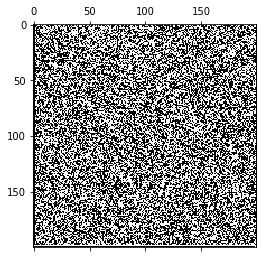

In [150]:
n ,p = 200, 0.5
T = creerMilieu(n, p)
afficherEcoulement(T)

In [151]:
##simulation de l'écoulement
##la fonction applique la fonction parcours à un milieu poreux 
##les cases à 2 à la fin de l'application de la fonction parcours, sont les cases vides remplies d'eau.
##les cases vides non atteintes par l'écoulement restent en blanc
def parcours(laby, entree, sortie):
    ie, je = entree
    io, jo = sortie
    p = creer_pile()
    laby[ie][je] = 2
    empiler(p, (ie, je))
    ##plt.matshow(laby, cmap = colors.ListedColormap(['black', 'white', 'blue']))
    while not est_vide(p):
        i, j = depiler(p)
        ##print(i, j)
        for c in casesVoisines(laby, i, j):
            iv, jv = c
            ##print(iv, jv, laby[iv][jv])
            if laby[iv][jv] == 1:
                laby[iv][jv] = 2
                empiler(p, (iv, jv))
            ##print(p)
            
def simulerEcoulement(T):
    parcours(T, (0, 1), (len(T) - 1, len(T) -2))
    return T 
##on renvoie le nom du tableau afin de pouvoir composer (cf. ci-dessous), les trois fonctions
##creerMilieu, simulerEcoulement et afficherEcoulement

In [152]:
n ,p = 200, 0.5
milieuPoreux = creerMilieu(n, p)
print(milieuPoreux)

[[0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [153]:
simulerEcoulement(milieuPoreux)
print(milieuPoreux)

[[0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

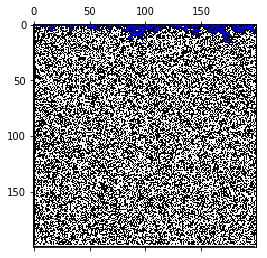

In [157]:
n, p = 200, 0.5
afficherEcoulement(simulerEcoulement(creerMilieu(n, p)))

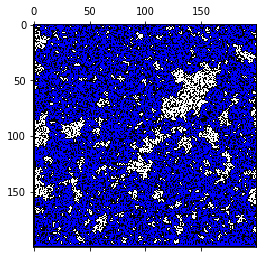

In [158]:
n, p = 200, 0.6
afficherEcoulement(simulerEcoulement(creerMilieu(n, p)))

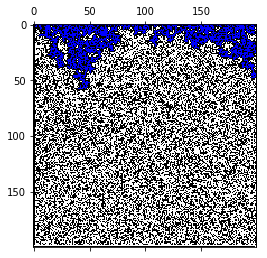

In [159]:
n, p = 200, 0.55
afficherEcoulement(simulerEcoulement(creerMilieu(n, p)))

In [174]:
##estimation de la probabilité d'écoulement
##le liquide s'écoule si la case de la sortie, d'indices (n - 1, n - 2), est à deux après appel à la fonction
##parcours
def estimerProba(n, a, b, N, M): #N est le nombre d'intervalles de la subdivision régulière de [0 ; 1] 
    ##choisie pour échantillonner les valeurs de p
    ##M est le nombre de simulation pour chaque valeur de p testée
    
    #on échantillonne les probabilités p dans [0 ; 1], avec un pas dp = 1/N
    ##pour cela on construit une subdivision régulière de [0 ; 1] en N + 1 points
    ##exemple pour a, b, N = 0, 1, 20, on aura un pas de (1 - 0) / N = 0.05##
    dp = (b - a) / N
    Lp = [a]
    for k in range(N):
        Lp.append(Lp[-1] + dp)
    LP = [0.0] * len(Lp) ##liste des probabilités P, initialisée à zéro ; LP[i] sera la valeur de P pour que le
    ##milieu soit traversé par le liquide, obtenue à l'issue des M simulations pour la valeur p égale à Lp[i]
    
    ## pour chaque valeur de p, on effectue M tests, la probabilité P pour que le milieu soit traversé est estimée
    ## par le rapport m/M où m est le nombre de simulations dans lesquelle le milieu est traversé
    ##(i.e. la case de sortie est à 2 après appel à la fonction parcours)
    for i in range(len(Lp)):
        p = Lp[i]
        m = 0 #compteur des simulation dans lesquelles la sortie est atteinte
        for k in range(M):
            T = simulerEcoulement(creerMilieu(n, p))
            if T[-1][-2] == 2: ##si la sortie est atteinte par le liquide
                m += 1
        LP[i] = m / M
    return Lp, LP ##on renvoie la liste des probas p et la liste des probas P correspondantes

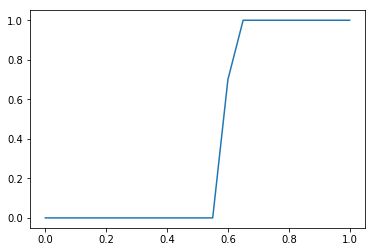

In [181]:
Lp, LP = estimerProba(200, 0, 1, 20, 20)
##affichage de la fonction échantillonnée
plt.plot(Lp, LP)
plt.savefig("Lp-LP pour a_b_n_N_M = 200-0-1-20-20.png")
plt.show()

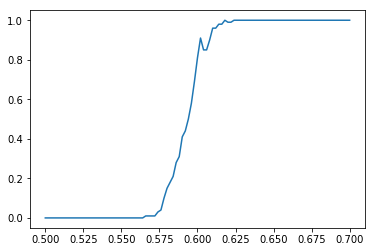

In [184]:
##l'intervalle [0.5 ; 0.7] semble devoir retenir l'intérêt
Lp, LP = estimerProba(200, 0.5, 0.7, 100, 100) #le temps d'exécution est long
plt.plot(Lp, LP)
plt.savefig("Lp-LP pour a_b_n_N_M = 200-0.5-0.6-100-100.png")
plt.show()

In [199]:
##on cherche la valeur p_c de p pour laquelle la probabilité d'écoulement P est égale à 0.5
##on effectue une recherche par dichotomie
##au fil des itérations, pa est une valeur telle que la proba P estimée est > 0.5
##pb est une valeur telle que la proba P estimée est > 0.5
##l'algorithme est correct à condition que sur toute simulation les probas estimées P persistent à être,
##respectivement < 0.5 et > 0.5 (ce que l'on admet, bien qu'incertain)
def valCritique(n, eps, M = 100): ##M nombre de simulations pour chaque estimation de la proba P
    pa, pb = 0.0, 1.0 #extrémités de l'intervalle initial de recherche
    while pb - pa > 2 * eps:
        p = (pb + pa) / 2
        ##estimation de P pour p = pc sur M simulations
        m = 0 #compteur des simulation dans lesquelles la sortie est atteinte
        for k in range(M):
            T = simulerEcoulement(creerMilieu(n, p))
            if T[-1][-2] == 2: ##si la sortie est atteinte par le liquide
                m += 1
        P = m / M
        if P > 0.5:
            pb = p
        else:
            pa = p
    return pa, pb

In [200]:
n, eps = 200, 0.01
pa_c, pb_c = valCritique(n, eps, M = 100)
p_c = (pb_c + pa_c) / 2
p_c, pb_c - pa_c

(0.5859375, 0.015625)

In [201]:
n, eps = 200, 0.001
pa_c, pb_c = valCritique(n, eps, M = 100)
p_c = (pb_c + pa_c) / 2
p_c, pb_c - pa_c

(0.5947265625, 0.001953125)

In [208]:
##on prend
p_c = 0.595 #comme approximation de p_c pour n = 200

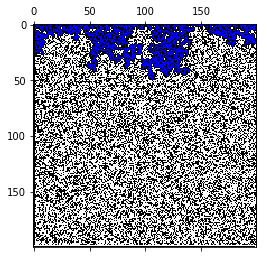

In [212]:
n, p = 200, 0.95 * p_c
afficherEcoulement(simulerEcoulement(creerMilieu(n, p)))

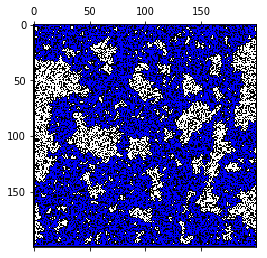

In [213]:
n, p = 200, p_c
afficherEcoulement(simulerEcoulement(creerMilieu(n, p)))

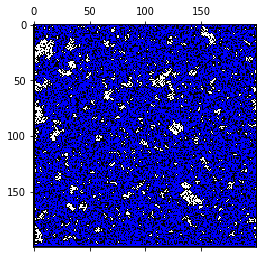

In [214]:
n, p = 200, 1.05 * p_c
afficherEcoulement(simulerEcoulement(creerMilieu(n, p)))